# Credit risk for mortgages

## Part 1

### 1)

Expected utility for giving loan = Probability of default \* cost of default + probability of downpayment \* interest gain  
Expected utility for not giving loan = 0

\begin{align}
E(U) &= P \cdot L \cdot ((1+R)^T-1) - (1-P) \cdot L \\
&= PL(1+R)^T - PL - L + PL \\
&= L(P(1+R)^T-1)
\end{align}

In [1]:
def expected_utility():
    return loan * (get_proba() * (1+interest_rate)**duration - 1)

If the expected utility of giving the loan is positive, we give loan, if negative, we don't.

### 2)

##### Questions to self:
+ Should the ordered qualitative attributes be made numeric? If so, what should the number conversions be? F.ex checking account, for the first two categories we can use the center, but what about the third where there is no center? Same holds for several of the other ordered qualitative attributes. Is an option for the (x,->)-intervals to use an expectation assuming f.ex an exponential distribution in the category? Or is it better to just number them and model that attribute non-linearly?
+ Should we just use kNN, or are we free to select any method? Or should we try many different methods and select the best one?
+ How should we select? Should we just use a quarter of the data as a holdout for method selection, and then trim parameters for each method using cv on the remaining three quarters? Or is it better to use some kind of neural network kind of method to combine many other methods. How involved should we do this?

In [2]:
import pandas as pd
import numpy as np

In [3]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = ['repaid']

In [4]:
df = pd.read_csv('../../data/credit/german.data', sep=' ',
                     names=features+target)

In [5]:
numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [f for f in features if f not in numeric_features]

In [6]:
# Treat the categorical features differently by expanding them into binary features 
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [7]:
print(numeric_features)
print(categorical_features)

['duration', 'amount', 'installment', 'residence time', 'age', 'credits', 'persons']
['checking account balance', 'credit history', 'purpose', 'savings', 'employment', 'marital status', 'other debtors', 'property', 'other installments', 'housing', 'job', 'phone', 'foreign']


In [8]:
df.describe()

,duration,amount,installment,residence time,age,credits,persons,repaid,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000,0.269000,0.063000,...,0.154000,0.047000,0.814000,0.713000,0.108000,0.2000,0.630000,0.148000,0.404000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.443662,0.243085,...,0.361129,0.211745,0.389301,0.452588,0.310536,0.4002,0.483046,0.355278,0.490943,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


In [9]:
features = df.drop(target, axis=1).select_dtypes(include=[np.number]).columns.tolist()
binary_features = [f for f in features if f not in numeric_features]

In [10]:
df[target+features][:5]

,repaid,duration,amount,installment,residence time,age,credits,persons,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
0,1,6,1169,4,4,67,2,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,2,48,5951,2,2,22,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,1,12,2096,2,3,49,1,2,0,0,...,0,0,1,1,0,1,0,0,0,0
3,1,42,7882,2,4,45,1,2,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,24,4870,3,4,53,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)

In [13]:
X_train.describe()

,duration,amount,installment,residence time,age,credits,persons,checking account balance_A12,checking account balance_A13,checking account balance_A14,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,21.044000,3257.537333,2.994667,2.825333,35.409333,1.412000,1.142667,0.266667,0.062667,0.393333,...,0.137333,0.052000,0.818667,0.722667,0.090667,0.202667,0.634667,0.141333,0.401333,0.034667
std,11.979931,2807.583953,1.113084,1.103532,11.485716,0.586556,0.349966,0.442512,0.242524,0.488816,...,0.344429,0.222175,0.385551,0.447981,0.287326,0.402254,0.481845,0.348598,0.490495,0.183056
min,4.000000,276.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1404.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2317.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,3911.000000,4.000000,4.000000,41.750000,2.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_test_unscaled = X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [17]:
X_train

array([[-6.71904353e-01, -4.12208201e-01, -8.94209336e-01, ...,
        -4.05704663e-01, -8.18766523e-01, -1.89503568e-01],
       [ 2.46910650e-01,  6.14684226e-02,  4.79468813e-03, ...,
        -4.05704663e-01,  1.22134940e+00, -1.89503568e-01],
       [-9.22490263e-01, -6.18929376e-01,  9.03798712e-01, ...,
        -4.05704663e-01, -8.18766523e-01, -1.89503568e-01],
       ...,
       [-7.55432989e-01, -3.44132779e-01,  9.03798712e-01, ...,
         2.46484720e+00,  1.22134940e+00, -1.89503568e-01],
       [ 2.46910650e-01, -2.76057358e-01,  9.03798712e-01, ...,
        -4.05704663e-01,  1.22134940e+00, -1.89503568e-01],
       [-5.04847080e-01, -7.85731979e-01,  9.03798712e-01, ...,
        -4.05704663e-01, -8.18766523e-01,  5.27694550e+00]])

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
# Solver 'lbgfs' for faster and better results on small datasets
# We start with alpha 1e-4 (default)
# Start with only one hidden layer, size 70 is a bit more than features ...
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70))

In [20]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=70, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from scipy import stats

In [22]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.728

In [23]:
n_folds = 10
alphas = np.logspace(-5, 0, 21)
accuracies = np.zeros(len(alphas))
deviations = np.zeros(len(alphas))
i = 0
for alpha in alphas:
    accuracy = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(70))
        classifier.fit(X_train[train], y_train[train])
        y_pred = classifier.predict(X_train[test])
        accuracy[j] = accuracy_score(y_train[test], y_pred)
        j += 1
    accuracies[i] = np.mean(accuracy)
    deviations[i] = stats.sem(accuracy)
    i += 1

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
% matplotlib inline

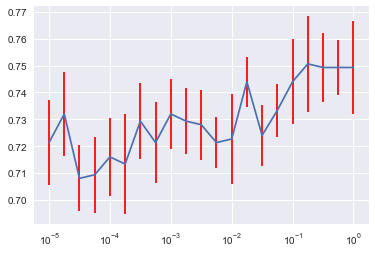

In [25]:
plt.errorbar(alphas, accuracies, yerr=deviations, ecolor='r')
plt.xscale('log')

In [26]:
# Here we could perhaps have made some clever claculation to 
# find the best alpha using 1e-4 as default and the deviations 
# to select the closest to default among the somewhat significant
# or we could just go default, or we could just use the best
# even though which one is best changes for every run.
nn_alpha = alphas[np.argmax(accuracies)]

So alpha setting doesn't seem to matter much here, perhaps layer size is more important

Out of curiousity, we might try to see if we get more conclusive results if we judge the alphas by utility rather than accuracy

In [27]:
def expected_utility(loan, rate, time, prob):
    return loan * (prob * (1+rate)**time - 1)
def utility(loan, rate, time, outcome):
    return loan * (-1 if outcome==2 else (1+rate)**time - 1)

In [28]:
n_folds = 10
rate = 0.005
alphas = np.logspace(-5, -3, 11)
accuracies = np.zeros(len(alphas))
deviations = np.zeros(len(alphas))
i = 0
for alpha in alphas:
    util = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(70))
        classifier.fit(X_train[train], y_train[train])
        for k in range(len(y_train[test])):
            prob = classifier.predict_proba(X_train[test[k]].reshape(1,-1))[0,0]
            loan, time = X_test_unscaled[k:k+1][['amount', 'duration']].values.ravel()
            util[j] += utility(loan, rate, time, y_train[test[k]]) \
                        if expected_utility(loan, rate, time, prob) > 0 \
                        else 0 
                                         
        j += 1
    accuracies[i] = np.mean(util)
    deviations[i] = stats.sem(util)
    i += 1

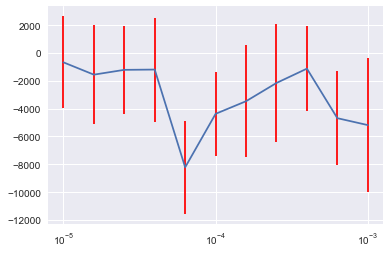

In [29]:
plt.errorbar(alphas, accuracies, yerr=deviations, ecolor='r')
plt.xscale('log')

Again no significant difference between the alphas

Now for layer sizes

In [30]:
n_folds = 10
hidden_components = np.arange(10, 230, 10)
accuracies = np.zeros(len(hidden_components))
deviations = np.zeros(len(hidden_components))
i = 0
for components in hidden_components:
    accuracy = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(components))
        classifier.fit(X_train[train], y_train[train])
        y_pred = classifier.predict(X_train[test])
        accuracy[j] = accuracy_score(y_train[test], y_pred)
        j += 1
    accuracies[i] = np.mean(accuracy)
    deviations[i] = stats.sem(accuracy)
    i += 1

<Container object of 3 artists>

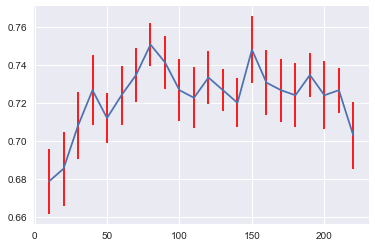

In [31]:
plt.errorbar(hidden_components, accuracies, yerr=deviations, ecolor='r')

So number of components also make little difference above, say 40 if even then. Perhaps try some combinations of multiple layers of different sizes, computationally it seems prohibitive to try all combinations of multiple layers of different sizes.

In [32]:
# Some sort of attempt to order the combinations in increasing complexity
n_folds = 10
hidden_components = [(50), (70), (100), \
                     (50, 10), (70, 10), (100, 10), \
                     (50, 30), (70, 30), (100, 30), \
                     (50, 50), (70, 50), (100, 50), \
                     (50, 70), (70, 70), (100, 70), \
                     (50, 30, 10), (70, 30, 10), (100, 30, 10), \
                     (16, 4, 2)]
accuracies = np.zeros(len(hidden_components))
deviations = np.zeros(len(hidden_components))
i = 0
for components in hidden_components:
    accuracy = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=components)
        classifier.fit(X_train[train], y_train[train])
        y_pred = classifier.predict(X_train[test])
        accuracy[j] = accuracy_score(y_train[test], y_pred)
        j += 1
    accuracies[i] = np.mean(accuracy)
    deviations[i] = stats.sem(accuracy)
    i += 1

<Container object of 3 artists>

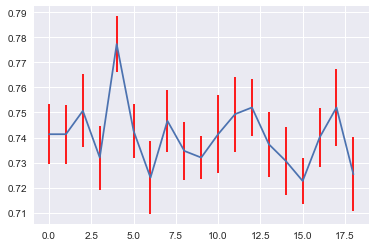

In [33]:
plt.errorbar(range(len(hidden_components)), accuracies, yerr=deviations, ecolor='r')

In [34]:
# Here we have to see if we should pick from the range above, 
# or from this list of combinations, or we could choose from
# among all those options. Once again we could probably create 
# some algorithm to choose based on the deviations. Again it 
# looks quite random which one performs best, so we might as 
# well just go argmax again. Another simple option might have 
# been argmax(accuracies-deviations)
nn_hidden_components = hidden_components[np.argmax(accuracies)]

Once again it's hard to point out any specific combination of layers that seems better than the others.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.utils import resample

In [36]:
n_features = len(features)

In [37]:
n_bootstraps = 100
n_folds = 10
accuracies = np.zeros(n_features-1)
deviations = np.zeros(n_features-1)
pca = PCA()
X_pca = pca.fit_transform(X_train)
for components in range(1, n_features):
    accuracy = np.zeros(n_bootstraps * n_folds)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_pca):
        for B in range(n_bootstraps):
            Xtr, ytr = resample(X_pca[train, :components], y_train[train])
            Xte, yte = resample(X_pca[test, :components], y_train[test])
            y_pred = LogisticRegression().fit(Xtr, ytr).predict(Xte)
            accuracy[i] = accuracy_score(y_pred, yte)
            i += 1
    accuracies[components-1] = np.mean(accuracy)
    deviations[components-1] = stats.sem(accuracy)

<Container object of 3 artists>

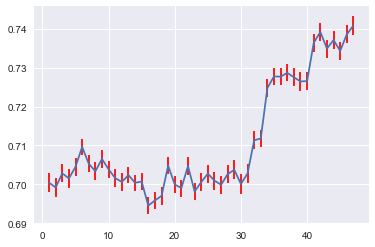

In [38]:
plt.errorbar(np.arange(1,n_features), accuracies, yerr=deviations, ecolor='r')

It looks like we get better predictions the more components we add, so we might as well drop the PCR and use all

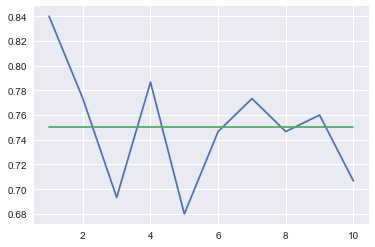

In [39]:
i = 0
accuracies = np.zeros(10)
for train, test in KFold(n_splits=10).split(X_train):
    y_pred = LogisticRegression().fit(X_train[train], y_train[train]).predict(X_train[test])
    accuracies[i] = accuracy_score(y_pred, y_train[test])
    i += 1
plt.plot(np.arange(1,11), accuracies, np.arange(1,11), [np.average(accuracies) for _ in range(1,11)])

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
n_folds = 10
ks = np.arange(1, int((n_folds-1)*len(X_train)/n_folds))
accuracies = np.zeros(len(ks))
deviations = np.zeros(len(ks))
for k in ks:
    accuracy = np.zeros(n_folds)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        y_pred = KNeighborsClassifier(n_neighbors=k).fit(X_train[train], y_train[train]).predict(X_train[test])
        accuracy[i] = accuracy_score(y_pred, y_train[test])
        i += 1
    accuracies[k-1] = np.mean(accuracy)
    deviations[k-1] = stats.sem(accuracy)

<Container object of 3 artists>

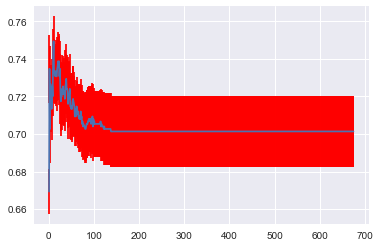

In [42]:
plt.errorbar(ks, accuracies, yerr=deviations, ecolor='r')

In [43]:
n_folds = 10
# Ks from 1 to the maximum number of point in the cv training set
# This could be a huge number, perhaps we should limit it somehow?
# ks = np.arange(1, int(((n_folds-1)/n_folds)*len(X_train)))
# Perhaps it's better to choose differently. Perhaps not every k
# in the interval, and perhaps we don't need the upper half?
n_tr_points = int(((n_folds-1)/n_folds)*len(X_train))
# Start at 1 (10**0), end at n_tr_point/2 (10**np.log10(int(n_tr_point/2)))
ks = np.logspace(0, np.log10(int(n_tr_points/2)), 50)
accuracies = np.zeros(len(ks))
deviations = np.zeros(len(ks))
n_bootstraps = 100
j = 0
for k in ks:
    k = int(k)
    accuracy = np.zeros(n_folds*n_bootstraps)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        for B in range(n_bootstraps):
            Xtr, ytr = resample(X_train[train], y_train[train])
            Xte, yte = resample(X_train[test], y_train[test])
            y_pred = KNeighborsClassifier(n_neighbors=k).fit(Xtr, ytr).predict(Xte)
            accuracy[i] = accuracy_score(y_pred, yte)
            i += 1
    accuracies[j] = np.mean(accuracy)
    deviations[j] = stats.sem(accuracy)
    j += 1

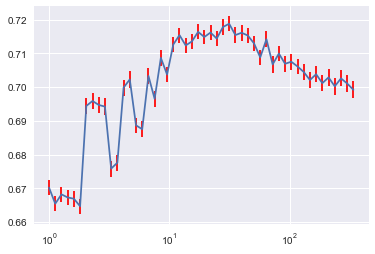

In [44]:
plt.errorbar(ks, accuracies, yerr=deviations, ecolor='r')
plt.xscale('log')

In [45]:
# Once again we have many candidates for best k, so which one do we pick?
# This time, lets go
knn_k = int(ks[np.argmax(accuracies-deviations)])
# Though I suppose an even better option, here and for the NN
# might be to create multiple approximately evenly good models
# and use all of them

Could we perhaps improve our kNN by reducing the dimensionality?

In [46]:
n_bootstraps = 100
n_folds = 10
accuracies = np.zeros(n_features-1)
deviations = np.zeros(n_features-1)
pca = PCA()
X_pca = pca.fit_transform(X_train)
# We already have this: X_pca = pca.fit_transform(X_train)
for components in range(1, n_features):
    accuracy = np.zeros(n_bootstraps * n_folds)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_pca):
        for B in range(n_bootstraps):
            Xtr, ytr = resample(X_pca[train, :components], y_train[train])
            Xte, yte = resample(X_pca[test, :components], y_train[test])
            y_pred = KNeighborsClassifier(n_neighbors=knn_k).fit(Xtr, ytr).predict(Xte)
            accuracy[i] = accuracy_score(y_pred, yte)
            i += 1
    accuracies[components-1] = np.mean(accuracy)
    deviations[components-1] = stats.sem(accuracy)

<Container object of 3 artists>

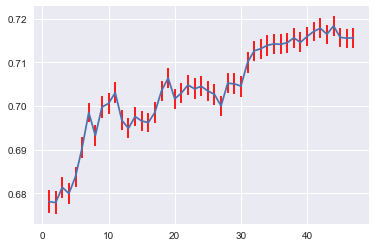

In [47]:
plt.errorbar(np.arange(1,n_features), accuracies, yerr=deviations, ecolor='r')

It seems that here also, as with Logistic regression, we might as well use all the components

Let's now check the accuracy of always granting

In [48]:
accuracy_score(np.ones(len(y_train)), y_train)

0.7013333333333334

OK, so now we have three methods that seem fairly equally good at prediction, but with accuracies around 0.73 they arn't very much better than the base at 0.70, so where do we go from here? What happens if we try to use each of the three and classify by majority vote? Will that improve accuracy? Shoudl we somehow weigh the methods? Other things to try, what if we rewind and instead of creating dummies for all categorical features we give ordered values to the features with ordered categories?

Try some kind of likelihood calculation based on get_proba() from all methods and then use that to rate the methods to weigh them, then compare the performance of each on the test set vs the combination of the three.

Make sure to, during fitting, store the feature transformations so that we can use them to transform new data to be predicted

In [49]:
# Should we create multiple models of each kind by 
# bootstrapping the training set, or just create one of each
# using the whole training set? Lets go with the simple approach
classifiers = [MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=nn_hidden_components).fit(X_train, y_train), \
               LogisticRegression().fit(X_train, y_train), \
               KNeighborsClassifier(n_neighbors=knn_k).fit(X_train, y_train)]

In [50]:
probabilities = np.zeros((len(X_test), len(classifiers)), dtype=np.float64)
for i in range(len(X_test)):
    for j in range(len(classifiers)):
        probabilities[i, j] = classifiers[j].predict_proba(X_test[i].reshape(1, -1))[:,y_test[i]-1]
# We do y_test-1 to get outcomes 1, 2 to 0, 1 to correspond to indices

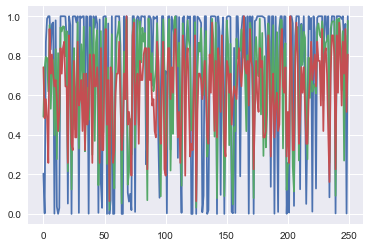

In [51]:
plt.plot(range(len(X_test)), probabilities)

In [52]:
n_ways_of_weighing = 3
weights = np.zeros((n_ways_of_weighing, len(classifiers)))

In [53]:
# We could have started with np.ones(len(classifiers))/len(classifiers)
# but this way is even more uninformed
method_weights = np.array([probabilities[0, j] for j in range(len(classifiers))])
method_weights /= np.sum(method_weights)
for i in range(1, len(X_test)):
    method_weights *= probabilities[i, :]
    method_weights /= np.sum(method_weights)

In [54]:
weights[0, :] = method_weights
method_weights

array([1.84887820e-104, 9.58594009e-001, 4.14059907e-002])

Well, from this it looks like the logistic regression is the only one worth anything and we might just go ahead with only that one, but perhaps it's better to keep them all around in case the others perform better on different datasets or runs.

But what if we try weighing them on utility instead?

In [55]:
rate = 0.005
max_loan = X_test_unscaled['amount'].max()
def utility(loan, rate, time, outcome):
    return loan * (-1 if outcome==2 else (1+rate)**time - 1)

In [56]:
def expected_utility(loan, rate, time, prob):
    return loan * (prob * (1+rate)**time - 1)

In [57]:
method_weights = np.ones(len(classifiers))/len(classifiers)
for i in range(len(X_test)):
    loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
    loan /= max_loan
    prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
    # Utility with numbers above will range between -1 and ca 0.43, and we
    # can't use negative numbers (or especially the quite likely utility 0)
    # So we have to transform it somehow before use. Adding 2 to make it 
    # range from 1 to ca 2.43 seems reasonable
    method_weights *= 2 + np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
    method_weights /= np.sum(method_weights)

In [58]:
weights[1, :] = method_weights
method_weights

array([0.02155585, 0.40613086, 0.57231329])

Suddenly things are looking different. Out of curiousity, what would have happened with different utility transformations, I wonder.

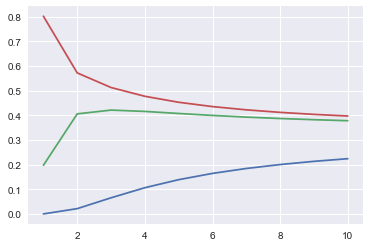

In [59]:
xvals = np.arange(10)
yvals = np.zeros((len(xvals), len(classifiers)))
for trans in xvals:
    method_weights = np.ones(len(classifiers))/len(classifiers)
    for i in range(len(X_test)):
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        loan /= max_loan
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        # Utility with numbers above will range between -5 and ca 4.1, and we
        # can't use negative numbers (or especially the quite likely utility 0)
        # So we have to transform it somehow before use. Adding 10 to make it 
        # range from 5 to ca 14.1 seems reasonable
        method_weights *= (1+trans) + np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
        method_weights /= np.sum(method_weights)
    yvals[trans] = method_weights
plt.plot(1+xvals, yvals)

As expected increasing the transformations evens out the weighing since higher transformation value makes the difference between correct and incorrect classification less, but it's evening out slower than I had expected

Perhaps it's also possible to weigh them based on total utility over the test set?

In [60]:
method_utility = np.zeros(len(classifiers))
for i in range(len(X_test)):
    loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
    prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
    method_utility += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])

# Adjust away possible negative numbers (if you lose money, you get 0 weight)
method_weight = method_utility - min(0, np.min(method_utility))
method_weight = method_weight / np.sum(method_weight)
print(method_utility)

[-87817.71416024 -11876.51280245  -5097.94683599]


In [61]:
weights[2, :] = method_weight
method_weight

array([0.        , 0.47863821, 0.52136179])

Now check for each of the three ways of weighing the methods, which gives the best utility over the test set. Perhaps we are now overusing the test set and that we ought to have had another?

In [62]:
weights.T

array([[1.84887820e-104, 2.15558513e-002, 0.00000000e+000],
       [9.58594009e-001, 4.06130863e-001, 4.78638206e-001],
       [4.14059907e-002, 5.72313286e-001, 5.21361794e-001]])

In [63]:
probabilities[0, :]

array([0.2039158 , 0.49150959, 0.74193548])

In [64]:
probabilities[0, :] @ weights.T

array([0.50187872, 0.62863233, 0.62207208])

In [65]:
weighing_utility = np.zeros(n_ways_of_weighing)
for i in range(len(X_test)):
    loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
    prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
    prob = prob @ weights.T
    weighing_utility += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])

weighing_utility

array([-12617.09299169,   2698.40109883,   2698.40109883])

OK, not so surprising that the weighing method that maximizes utility over the test set gets the highest utility over the test set, I suppose, so let's do it better and fit weights and then test using XV over the test set. And lets also add the stupid weighing, equal weight for all models as well as variants for the second with transformations of 1, 3 and 4. Finally we'll add three weighings that basically are one for each of the methods

In [66]:
n_folds = 5
n_ways_of_weighing = 10
weights = np.zeros((n_ways_of_weighing, len(classifiers)))
weighing_utility = np.zeros((n_folds, n_ways_of_weighing))
n = 0
for train, test in KFold(n_splits=n_folds).split(X_test):
    # Fit weights
    weights[0, :] = np.ones(len(classifiers))/len(classifiers)
    weights[1, :] = np.ones(len(classifiers))/len(classifiers)
    weights[2, :] = np.ones(len(classifiers))/len(classifiers)
    weights[3, :] = np.ones(len(classifiers))/len(classifiers)
    weights[4, :] = np.ones(len(classifiers))/len(classifiers)
    weights[5, :] = np.zeros(len(classifiers))
    weights[6, :] = np.ones(len(classifiers))/len(classifiers)
    weights[7, :] = np.array([1, 0, 0])
    weights[8, :] = np.array([0, 1, 0])
    weights[9, :] = np.array([0, 0, 1])
    for i in train:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        loan /= max_loan
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        util = np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
        
        weights[0, :] *= probabilities[i, :]
        weights[0, :] /= np.sum(weights[0, :])
        weights[1, :] *= 1 + util
        weights[1, :] /= np.sum(weights[1, :])
        weights[2, :] *= 2 + util
        weights[2, :] /= np.sum(weights[2, :])
        weights[3, :] *= 3 + util
        weights[3, :] /= np.sum(weights[3, :])
        weights[4, :] *= 4 + util
        weights[4, :] /= np.sum(weights[4, :])
        weights[5, :] += util

    # Adjust away possible negative numbers (if you lose money, you get 0 weight)
    weights[5, :] -= min(0, np.min(weights[5, :]))
    weights[5, :] /= np.sum(weights[5, :])
    
    # Test performance
    for i in test:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        prob = prob @ weights.T
        weighing_utility[n, :] += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
    
    n += 1

In [67]:
weighing_utility

array([[  1061.2563866 ,    330.11401108,   1061.2563866 ,
          1061.2563866 ,   1061.2563866 ,   1061.2563866 ,
          2523.60779741, -16976.32957169,   2869.31337565,
           330.11401108],
       [ -3947.08203574,  -4538.62337046,  -4176.99695312,
         -3966.78398637,  -3966.78398637,  -4176.99695312,
         -9839.82790266, -17083.70293071,  -3947.08203574,
         -4559.88762704],
       [  -154.60437037,   1381.71472434,    384.03198619,
          1535.44886203,   1930.27996715,    384.03198619,
          2682.73462382, -18841.50567349,    721.09914764,
          1294.56397618],
       [  2643.03520501,    726.82855762,   1278.44586462,
          1278.44586462,   1278.44586462,   1278.44586462,
          4924.10369761,  -5008.85219588,   2643.03520501,
          3314.59898924],
       [  6598.13159028,   4517.22490104,   4517.22490104,
          4517.22490104,   4517.22490104,   4517.22490104,
          7652.59775483, -29907.32378847, -14162.878495  ,
         -5

In [68]:
np.mean(weighing_utility, axis=0)

array([  1240.14735516,    483.45176473,    612.79243707,    885.11840558,
          964.08462661,    612.79243707,   1588.6431942 , -17563.54283205,
        -2375.30256049,  -1019.5893672 ])

In [69]:
stats.sem(weighing_utility)

array([1725.69945951, 1455.7160687 , 1394.33175772, 1366.41529552,
       1378.04335678, 1394.33175772, 3004.81270765, 3950.9330546 ,
       3191.3543435 , 1708.32391658])

<Container object of 3 artists>

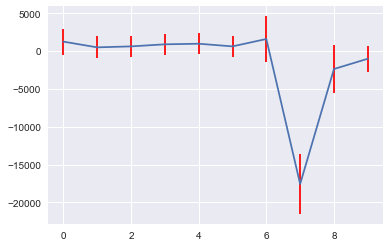

In [70]:
plt.errorbar(range(n_ways_of_weighing), np.mean(weighing_utility, axis=0), yerr=1*stats.sem(weighing_utility), ecolor='r')

So in conclusion it seems hard to know which method works best, other than that the neural nets seem wto work quite poorly, and that that and logistic regression seems to give high variance. Which weighing method to use here is a question. One way is to go with simply argmax, another is to use the highest lower end of a $2\sigma$ interval, but I'll go with a compromise between the two: the lower end of the $\sigma$ interval. First though, it might be interesting to try this out using Bagging on the classifiers.

In [71]:
from sklearn.ensemble import BaggingClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Container object of 3 artists>

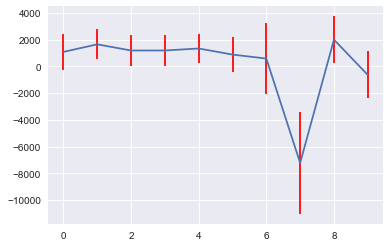

In [72]:
classifiers = [BaggingClassifier(MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=nn_hidden_components)).fit(X_train, y_train), \
               BaggingClassifier(LogisticRegression()).fit(X_train, y_train), \
               BaggingClassifier(KNeighborsClassifier(n_neighbors=knn_k)).fit(X_train, y_train)]

probabilities = np.zeros((len(X_test), len(classifiers)), dtype=np.float64)
for i in range(len(X_test)):
    for j in range(len(classifiers)):
        probabilities[i, j] = classifiers[j].predict_proba(X_test[i].reshape(1, -1))[:,y_test[i]-1]
# We do y_test-1 to get outcomes 1, 2 to 0, 1 to correspond to indices

n_folds = 5
n_ways_of_weighing = 10
weights = np.zeros((n_ways_of_weighing, len(classifiers)))
weighing_utility = np.zeros((n_folds, n_ways_of_weighing))
n = 0
for train, test in KFold(n_splits=n_folds).split(X_test):
    # Fit weights
    weights[0, :] = np.ones(len(classifiers))/len(classifiers)
    weights[1, :] = np.ones(len(classifiers))/len(classifiers)
    weights[2, :] = np.ones(len(classifiers))/len(classifiers)
    weights[3, :] = np.ones(len(classifiers))/len(classifiers)
    weights[4, :] = np.ones(len(classifiers))/len(classifiers)
    weights[5, :] = np.zeros(len(classifiers))
    weights[6, :] = np.ones(len(classifiers))/len(classifiers)
    weights[7, :] = np.array([1, 0, 0])
    weights[8, :] = np.array([0, 1, 0])
    weights[9, :] = np.array([0, 0, 1])
    for i in train:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        loan /= max_loan
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        util = np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
        
        weights[0, :] *= probabilities[i, :]
        weights[0, :] /= np.sum(weights[0, :])
        weights[1, :] *= 1 + util
        weights[1, :] /= np.sum(weights[1, :])
        weights[2, :] *= 2 + util
        weights[2, :] /= np.sum(weights[2, :])
        weights[3, :] *= 3 + util
        weights[3, :] /= np.sum(weights[3, :])
        weights[4, :] *= 4 + util
        weights[4, :] /= np.sum(weights[4, :])
        weights[5, :] += util

    # Adjust away possible negative numbers (if you lose money, you get 0 weight)
    weights[5, :] -= min(0, np.min(weights[5, :]))
    weights[5, :] /= np.sum(weights[5, :])
    
    # Test performance
    for i in test:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        prob = prob @ weights.T
        weighing_utility[n, :] += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
    
    n += 1
    
plt.errorbar(range(n_ways_of_weighing), np.mean(weighing_utility, axis=0), yerr=1*stats.sem(weighing_utility), ecolor='r')

Hmmm, well, it seems no better performance, except on the neural nets, and no less variance, so not much point to move forward on.

In [73]:
method_weights = weights[np.argmax(np.mean(weighing_utility, axis=0) - stats.sem(weighing_utility))]
method_weights

array([0.02384417, 0.50545876, 0.47069707])

For reference it might be interesting to see the test set earning of the base classifier of always granting a loan, basically mimicking the bank(s) the data is collected from. And also the perfect classfier

In [74]:
amounts = X_test_unscaled['amount'].values.ravel()
durations = X_test_unscaled['duration'].values.ravel()
reference_utility1 = np.array([utility(amounts[i], rate, durations[i], y_test[i]) for i in range(len(y_test))])
reference_utility2 = np.array([utility(amounts[i], rate, durations[i], y_test[i]) if y_test[i] == 1 else 0 for i in range(len(y_test))])

In [75]:
print("Total utility for always granting: " + str(np.sum(reference_utility1)))
print("Total utility for perfect classifier: " + str(np.sum(reference_utility2)))

Total utility for always granting: -249398.931887534
Total utility for perfect classifier: 70960.068112466


In this range (-235k, 64k) our best classifier around 3000 is quite close to zero

Now the question is only, have I tortured the data too much?

So, let's boil it down to an implementation

In [76]:
def fit(self):
    X = df[features].values
    y = df[target].values.ravel()
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)[:, :lr_components]

    classifiers = [MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=nn_hidden_components).fit(X, y), 
                   LogisticRegression().fit(X_pca, y), 
                   KNeighborsClassifier(n_neighbors=knn_k).fit(X, y)]

In [77]:
def predict_proba(self, x):
    x = scaler.transform(x)
    x_pca = pca.transform(x)
    return  classifier[0].predict_proba(x)[0,0] * method_weights[0] + \
            classifier[1].predict_proba(x_pca)[0,0] * method_weights[1] + \
            classifier[2].predict_proba(x)[0,0] * method_weights[2]

Concerning part 2 of the question: What are the implicit assumptions about the labelling process in the original data, i.e. what do the labels represent?  
The label 1 represents a repaid loan, the label 2 represents a defaulted loan, but it's quite explicit in the documentation as far as I can tell.

### 3)

In [78]:
def get_best_action():
    # If expected utility is 0, then it makes no difference to us whether we give the loan or not
    # so we maximize global utility by assuming that the utility for the lender is >0 with a loan
    return 1 if expected_utility(x,1) >= expected_utility(x,0) else 0

### 4)

[%run documentation](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-run)

In [79]:
%run -t TestLending.py

AttributeError: module 'aleksaw_banker' has no attribute 'AlexBanker'


IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.00 s.
Wall time:       0.04 s.


So, in this run I get a total utility of 5534, so I'm gaining a little money, unlike the random banker at -90503, but it's highly variable and also granting loans to around 1% of potential customers doesn't seem like a sustainable business model. I suppose a higher interest rate is in order, or different rates for different customers.

## Part 2

### 1)

+ **Is it possible to ensure that your policy maximises revenue?**  
It's difficult to ensure, of course, because there is randomness in the selection of training data, and also there is randomness in our future customers. We can only maximize expected revenue given the information that we have now. Then we can, if we want, increase the expected utility for each loan for which we decide to give the loan to get a lower expected variance in revenue at the cost of a slight decrease in expected total revenue, but strictly speaking then, we should probably take the variance into account in our utility function so that we can continue to simply maximize utility.
+ **How can you take into account the uncertainty due to the limited and/or biased data?**  
Aside from making sure our data collection doesn't introduce biases we have to be rigorous in our model selection, of course, but outside that the best option I believe is as stated above, to determine our risk profile by weighing expected total revenue against expected variance of the total revenue by varying the threshold individual expected utility at which we give a loan.  
One option here is of course to update our model continously as we are giving out loans and seeing how they turn out in order to continously improve it, but that might also skew the model further because the results of the bad loans may come in before the results of the good loans by the nature of lending money.  
Another option would be to create some kind of prior based on our subjective belief about what predicts good and bad loan takers to counterweigh the potentialy biased data we have, but that requires us to have previous knowledge good enough that we can be fairly confident that we are, in fact, not biasing our model ourselves through our own biases.
+ **What if you have to decide for credit for thousands of individuals and your model is wrong?**  
Then we have a big problem and I am probably out of a job, unless I can show that the model I created is as good as could be done given the data. If the model is wrong due to highly skewed data then I suppose we were simply terribly unlucky.
+ **How should you take that type of risk into account?**  
As stated above, we can always lower our risk through not maximizing expected total return. We can also consider if we should add other elements, pehaps judgement, into the final decision. It may, for example, be that past data aren't applicable to predicting new outcomes due to a change in circumstances.    
We could of course also have multiple teams develop their own decision model and apply all simultaneously to reduce the risk of making the wrong decision if one model is wrong, but in the end that doesn't entirely remove the risk that the new model, the collection of models, is wrong.  
In the end a decision has to be made, or in this case thousands of decisions, and we can only choose as well as we can choose.

### 2)

+ **Does the existence of this database raise any privacy concerns?**  
Given the number of attributes in the dataset there is a chance that, given sufficient information about individuals, they can be identified and then linked with a bad loan. On the other hand, if we have to match these attributes to the entire German population there will probably be quite a few candidates matching each row of personal attributes in our dataset. If, however, someone knew that you had applied for a loan of an exact size and duration, it's suddenly much more likely that they could pinpoint you in the database if you're there given that the loan amounts are recorded with accuracy of 1 DM.
+ **If the database was secret (and only known by the bank), but the credit decisions were public, how would that affect privacy?**  
It would have to compromise privacy that anyone could find out if you are or aren't credit-worthy. If the question means that the credit decisions were public but without names attached to them things are different. In that case it seems very unlikely that anyone is able to pinpoint a specific person to a specific credit decision, unless they are published in real time and someone knows that you just now applied for a loan of x DM for y months(if this information is published). This, of course, assumes that the database stays secret. If someone gains access to it we quickly end up in 1)  
If the only information is published is a collection of Granted/Not granted then the only way for someone to know the outcome of your application is to know the outcome of all other applications in the timespan covering this publication, and also to know that you applied for a loan.
+ **(a) Explain how you would protect the data of the people in the training set.**
The obvious way to protect the data of the people in the training set is to noise up the data in the training set according to some epsilon. This we did in the tutorial, and the method for this has been imported into the aleksaw_banker.py-file in the function private_fit, which noises up the data before using it to fit the model, and is tested and has it's performance graphed below.
+ **(b) Explain how would protect the data of the people that apply for new loans.**
The best way to do this seems to be to implement the exponential mechanism when deciding who gets a loan and who doesn't, although I'm uncertain if this truly is very valuable. Doing this has a potentially significant cost in two ways that most likely will have to be borne by the customer.  
The first is in terms of fairness. Why should someone qualified for a loan not get it due to randomness? And conversely, why should someone not qualified for a loan get one?  
The second is financial. The most obvious part is that not granting to good lenders and granting to poor lenders will cost the bank money, which it must recuperate by imposing higher interest rates on all lenders. The other way is for those whose application decisions are changed because of randomness, some will not get the money they need for something, while others will get a loan they never should have had, which they will probably default on with all the negative consequences that brings.  
Given this I'm finding it hard to defend the miniscule increment in privacy this will effectively bring to the customer. Given the complexity of the model deciding loan applications it will be very hard to get much information about single features given only the information about whether or not the loan was granted. Even knowing all the features but one it might be hard to find the last.  
I would say that not publishing loan decisions, and deleting (or noisifying) the information about the customer after processing the application will probably have a far better effect on actual privacy without the added costs. We also see from below that in order for the model to be useful for  its actual purpose, deciding on loan applications, the $\epsilon$ for the exponential mechanism must exceed 10, meaning it doesn't bring much increase in privacy anyway.  
  
The mechanism is implemented in the aleksaw_banker.py-file as get_private_best_action() and it's development and testing is documented below
+ **(c) Implement a private decision making mechanism for (b), and estimate the amount of loss in utility as you change the privacy guarantee.**

#### Implementing the exponential mechanism for deciding loan applications

In [80]:
from aleksaw_banker import NameBanker, PrivateBanker
from random_banker import RandomBanker

In [81]:
rate = 0.005
def utility(loan, rate, time, outcome):
    return loan * (((1+rate)**time - 1) if outcome == 1 else -1)
def private_utility(banker, x, a):
    return banker.expected_utility(x.values, a) - \
           banker.expected_utility(x.values, banker.get_best_action(x))

Implementing the exponential mechanism according to the formula  
$$ \pi(a | x) = \frac{e^{\epsilon U(a,q,x) / \Delta U}}{\sum_{a'}e^{\epsilon U(a,q,x) / \Delta U}}$$
where
$$\Delta U \equiv \max_{a \in A} \max_{x, y: \| x-y \|_1 \leq 1} |u(x, a) - u(y, a)|$$
but I simplify the latter to:   
$$\Delta U = \text{Utility}_{x, \text{repaid}} - \text{Utility}_{x, \text{defaulted}}$$

In [82]:
def get_private_best_action(banker, x, epsilon):
    # Find difference in utility for the two possible decisions for this partiular loan
    sensitivity = utility(x['amount'], rate, x['duration'], 1) \
                - utility(x['amount'], rate, x['duration'], 2)
    u_qax = np.array([private_utility(banker, x, 0), 
                      private_utility(banker, x, 1)])
    exponential = np.exp(epsilon*u_qax/sensitivity)
    prob_keep_grant = exponential[1] / np.sum(exponential)
    random_number = np.random.ranf(1)[0]
    if banker.get_best_action(x) == 1:
        # We would normally grant loan, but may flip the decision
        return 0 if random_number > prob_keep_grant else 1
    else:
        return 1 if random_number > (1-prob_keep_grant) else 0

In [83]:
banker = NameBanker(default_parameters=True)

In [84]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = ['repaid']
df = pd.read_csv('../../data/credit/german.data', sep=' ',
                     names=features+target)
numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [f for f in features if f not in numeric_features]
# Treat the categorical features differently by expanding them into binary features 
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
features = df.drop(target, axis=1).select_dtypes(include=[np.number]).columns.tolist()
binary_features = [f for f in features if f not in numeric_features]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)
banker.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aleks\Dropbox\A-University\UiO\2018H\IN-STK5000\ml-society-science\src\project-1\aleksaw_banker.py:265: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNeighborsClassifier(n_neighbors=self.knn_k).fit(X, y)]


In [86]:
get_private_best_action(banker, X_test.iloc[0], 0.1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0

In [87]:
rate = 0.005
es = 50
epsilon = np.logspace(-2, 3, es)
utility_std = np.zeros(es)
utility_mean = np.zeros(es)
putility_std = np.zeros(es)
putility_mean = np.zeros(es)
rutility_std = np.zeros(es)
rutility_mean = np.zeros(es)
banker = PrivateBanker(default_parameters=False) # Use defaults for quicker fit?
rbanker = RandomBanker()
banker.set_interest_rate(rate)
rbanker.set_interest_rate(rate)
for i in range(es):
    total_utility = np.zeros(10)
    priv_utility = np.zeros(10)
    rand_utility = np.zeros(10)
    j = 0
    for train, test in KFold(n_splits=10).split(df):
        banker.fit(df[features].iloc[train], df[target].iloc[train])
        rbanker.fit(df[features].iloc[train], df[target].iloc[train])
        for k in range(len(test)):
            paction = banker.get_best_action(df[features].iloc[test[k]], epsilon[i])
            action = banker.get_best_action(df[features].iloc[test[k]])
            raction = rbanker.get_best_action(df[features].iloc[test[k]])
            u = utility(df['amount'].iloc[test[k]], 
                        rate, 
                        df['duration'].iloc[test[k]],
                        df[target].iloc[test[k]].values)

            if action == 1:
                total_utility[j] += u
            if paction == 1:
                priv_utility[j] += u
            if raction == 1:
                rand_utility[j] += u
        j += 1
    utility_mean[i] = np.mean(total_utility)
    utility_std[i] = stats.sem(total_utility)
    putility_mean[i] = np.mean(priv_utility)
    putility_std[i] = stats.sem(priv_utility)
    rutility_mean[i] = np.mean(rand_utility)
    rutility_std[i] = stats.sem(rand_utility)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Choosing parameters
Choosing parameter 1/5
Alpha: 0.1
Choosing parameter 2/5
Layers: (50, 30, 10)
Choosing parameter 3/5
Components: 42
Choosing parameter 4/5
k: 52
Choosing parameter 5/5
Weights: [0.06152563 0.49571404 0.44276033]
Parameters chosen


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aleks\Dropbox\A-University\UiO\2018H\IN-STK5000\ml-society-science\src\project-1\aleksaw_banker.py:265: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNeighborsClassifier(n_neighbors=self.knn_k).fit(X, y)]


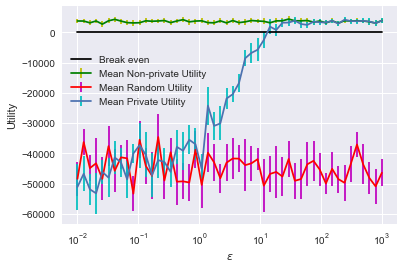

In [88]:
plt.errorbar(epsilon, utility_mean, yerr=utility_std, ecolor='y', label="Mean Non-private Utility", color='g')
plt.errorbar(epsilon, rutility_mean, yerr=rutility_std, ecolor='m', label="Mean Random Utility", color='r')
plt.errorbar(epsilon, putility_mean, yerr=putility_std, ecolor='c', label="Mean Private Utility")
plt.plot(epsilon, np.zeros(es), 'k-', label="Break even")
plt.xscale('log')
plt.xlabel(r"$\epsilon$")
plt.ylabel("Utility")
plt.legend(bbox_to_anchor=(0, 0.5), loc='lower left')

As expected we see the utility equals that of the random banker for high privacy, and as privacy decreases the utility approaches that of the non-private banker. As we have to approach $\epsilon=1$ before the private banker has significant gains over the random banker, and $\epsilon > 10$ for the private banker to make a profit, it's not much privacy we can afford to add. This is not so surprising given the weak signal in the data and the difficulty of the banker in turning a profit even without privacy.

#### Now for testing the banker using private training data

In [123]:
rate = 0.005
es = 50
epsilon = np.logspace(-5, 3, es)
utility_std = np.zeros(es)
utility_mean = np.zeros(es)
putility_std = np.zeros(es)
putility_mean = np.zeros(es)
rutility_std = np.zeros(es)
rutility_mean = np.zeros(es)
banker = NameBanker(default_parameters=True) # Use defaults for quicker fit?
pbanker = PrivateBanker(default_parameters=True) # Use defaults for quicker fit?
rbanker = RandomBanker()
banker.set_interest_rate(rate)
pbanker.set_interest_rate(rate)
rbanker.set_interest_rate(rate)
for i in range(es):
    total_utility = np.zeros(10)
    priv_utility = np.zeros(10)
    rand_utility = np.zeros(10)
    X = df.copy()
    j = 0
    for train, test in KFold(n_splits=10).split(X):
        banker.fit(X[features].iloc[train], X[target].iloc[train])
        pbanker.fit(X[features].iloc[train], X[target].iloc[train], 
                            epsilon[i], numeric_features, binary_features)
        rbanker.fit(X[features].iloc[train], X[target].iloc[train])
        for k in range(len(test)):
            paction = pbanker.get_best_action(X[features].iloc[test[k]])#, epsilon[i])
            action = banker.get_best_action(X[features].iloc[test[k]])
            raction = rbanker.get_best_action(X[features].iloc[test[k]])
            u = utility(X['amount'].iloc[test[k]], 
                        rate, 
                        X['duration'].iloc[test[k]],
                        X[target].iloc[test[k]].values)

            if action == 1:
                total_utility[j] += u
            if paction == 1:
                priv_utility[j] += u
            if raction == 1:
                rand_utility[j] += u
        j += 1
    utility_mean[i] = np.mean(total_utility)
    utility_std[i] = stats.sem(total_utility)
    putility_mean[i] = np.mean(priv_utility)
    putility_std[i] = stats.sem(priv_utility)
    rutility_mean[i] = np.mean(rand_utility)
    rutility_std[i] = stats.sem(rand_utility)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aleks\Dropbox\A-University\UiO\2018H\IN-STK5000\ml-society-science\src\project-1\aleksaw_banker.py:265: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNeighborsClassifier(n_neighbors=self.knn_k).fit(X, y)]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype in

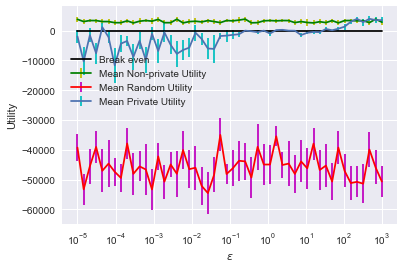

In [124]:
plt.errorbar(epsilon, utility_mean, yerr=utility_std, ecolor='y', label="Mean Non-private Utility", color='g')
plt.errorbar(epsilon, rutility_mean, yerr=rutility_std, ecolor='m', label="Mean Random Utility", color='r')
plt.errorbar(epsilon, putility_mean, yerr=putility_std, ecolor='c', label="Mean Private Utility")
plt.plot(epsilon, np.zeros(es), 'k-', label="Break even")
plt.xscale('log')
plt.xlabel(r"$\epsilon$")
plt.ylabel("Utility")
plt.legend(bbox_to_anchor=(0, 0.5), loc='lower left')

We see again some of the same picture as when applying the exponential mechanism, but we are now able to stay far above the result of the random banker even at high privacy, though we reach the performance of the non-private banker at a somewhat lower privacy level than with the exponential mechanism. 

### 3)

### Choose one concept of fairness, e.g.  balance of decisions with respect to gender.  
+ **How can you ensure that your policy is fair?** 
This is very difficult, because what is fair? We would first have to define what we mean by fair, and then someone would surely disagree with that definition and feel that our policy is unfair, thus I would claim that a truly fair policy is near impossible to achieve, so all we can try to do is to make it as fair as possible. Now, if we want our policy to be fair with respect to gender we should make sure that our decision is the same regardless of whether it's a male or female applicant given that the other data is similar, but this poses several challenges.  
One obvious challenge is how we deal with it if, given similar data, one gender is truly more reliable lenders than the other, what is fair in this case?  
Another challenge is that other features might be correlated with gender, so that even if we remove gender from the explainatory variables we might still get the effect of having it, and so downplay the difference between the model dependent on gender and the one truly independent of gender.
+ **How can you measure it?**
Some metric on the similarity of distributions including and excluding gender.
+ **How does the original training data affect the fairness of your policy?**
I'm not entirely sure what this question actually asks. Are we asked to measure the fairness of our model trained on the training data? If so, when assessing the answer we get from this calculation we quickly run into the same problems as described in the first answer above. Is the discrimination truly unfair? Is it due to coincidences in the training data or an underlying pattern? Etc.

#### Identify sensitive variables
Are we here asked to identify variables that may be considered sensitive? It's hard to draw a definite line here, but here are a few possibilities:  
*Gender*: Not really a separate variable in our dataset, but it can be separated out. This seems like the most obvious.  
*Marital status*: Same as above, but can be separated from gender. Should singles be treated differently from couples? Should singles be treated differently from other singles (separated/divorved/widowed)? Should people living in a married-like relationship be treated differently because they aren't officially married?  
*Job*: Should people be treated differently based on occupation and level of education when income and wealth has already been taken into account?  
*Foreign worker*: Should people be treated differently just because they are foreign? There might be legal arguments in favour of this discrimination in that it might be more difficult to collect something in case of default, but I don't know.

I'll go with gender as it's the most obvious, and the one suggested in the assignment, although that requires some tweaking of the data to extract gender as a separate feature, and since the second best choice, foreign worker, is split 37/963 among the two values while gender is split 310/690.

The original gender features have gender lumped together with marital status with females and males having different marital status categories, meaning there is potentially more information available for males than for females given that there are 3 categories with males and only 1 (and 1 with no entries) for females.

#### Simple analysis of data

In [91]:
# Reload the data
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = ['repaid']
df = pd.read_csv('../../data/credit/german.data', sep=' ',
                     names=features+target)
numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [f for f in features if f not in numeric_features]

In [92]:
df['gender'] = df.apply(lambda row: 'Female' if row['marital status'] in ('A92', 'A95') else 'Male', axis=1)

In [93]:
#df['marital status'] = df.apply(lambda row: 'Single' if row['marital status'] in ('A93', 'A95') else 'NonSingle', axis=1)

In [94]:
# Treat the categorical features differently by expanding them into binary features 
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
features = df.drop(target, axis=1).select_dtypes(include=[np.number]).columns.tolist()
binary_features = [f for f in features if f not in numeric_features]

In [95]:
from aleksaw_banker import NameBanker

In [96]:
df['proba good'] = 0.0
df['EU'] = 0.0
df['action'] = -1
#def update_df(row, banker, features):
#    row['proba good'] = banker.predict_proba(row[features].values)
#    row['EU'] = banker.expected_utility(row[features].values, 1)
#    row['action'] = banker.get_best_action(row[features])

In [97]:
# Set the rate to a level where some loans are rejected, but not so many that only a few are accepted
rate = 0.02 
banker = NameBanker(default_parameters=True) # Use defaults for quicker fit?
banker.set_interest_rate(rate)
for train, test in KFold(n_splits=5).split(df):
        banker.fit(df[features].iloc[train], df[target].iloc[train])
        for k in test:
            df['proba good'].iloc[k] = banker.predict_proba(df[features].iloc[k].values)
            df['EU'].iloc[k] = banker.expected_utility(df[features].iloc[k].values, 1)
            df['action'].iloc[k] = banker.get_best_action(df[features].iloc[k])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aleks\Dropbox\A-University\UiO\2018H\IN-STK5000\ml-society-science\src\project-1\aleksaw_banker.py:265: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNeighborsClassifier(n_neighbors=self.knn_k).fit(X, y)]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype in

In [98]:
{gender: data['proba good'].sum() / data['proba good'].count()
 for gender, data in df.groupby(['gender'])}

{'Female': 0.639882613962133, 'Male': 0.722697539496875}

So women are in general considered less likely to repay their loans by our banker.

In [99]:
{gender: data['action'].sum() / data['action'].count()
 for gender, data in df.groupby(['gender'])}

{'Female': 0.3935483870967742, 'Male': 0.6376811594202898}

And as a natural consequence they have their applications granted far less frequently, but do they turn out to be worse actually?

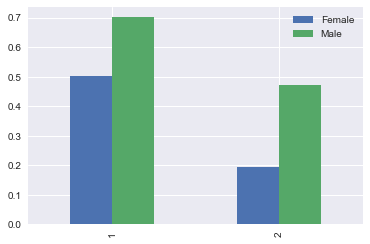

In [100]:
sel = lambda r, g: (df['repaid']==r) & (df['gender']==g)
pandas.DataFrame({g: {r: df['action'][sel(r,g)].sum() / df['action'][sel(r,g)].count() 
                      for r in (1,2)} 
                  for g in ('Male', 'Female')}).plot(kind='bar')

What is clear from this is that our banker would grant a loan to a male far more often than a female  also considering the actual repayment status. In fact, our banker seems far too eager to grant loans to males who won't repay, and far too hesitant to grant to females who will repay. This indicates our banker is not particularly balanced.

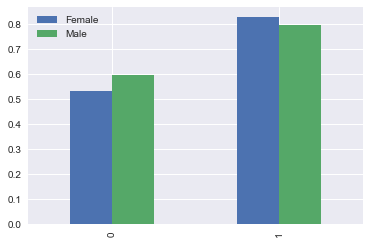

In [101]:
sel = lambda a, g: (df['action']==a) & (df['gender']==g)
pandas.DataFrame({g: {a: -1*((df['repaid'][sel(a,g)].sum() / df['repaid'][sel(a,g)].count())-2) 
                      for a in (0, 1)} 
                  for g in ('Male', 'Female')}).plot(kind='bar')

Now here we see that females who would have their loans granted would in fact be less likely to repay their loans than males who would not their loans granted, while females who would get their loans granted would be more likely to repay their loans than males who would get their loans granted, but the difference is very small. This indicates that our banker is relatively well calibrated, but that it seems more accurate with females than males.

Now, there are two factors that make it more likely our banker will grant a loan, one is high probability of repayment, the other is long duration of the loan, earning us more interest for the same potential loss, so let's see how our bankers estimate of probability corresponds with the actual probability of repayment. For this we'll have to group probabilities together, so let's use 10 groups: 0-10%, ... , 90-100%. With 310 female applicants this should give us an average of 31 per group.

In [102]:
x = np.around(np.linspace(0.1, 1, 10), decimals=1)
y_m = [(df['repaid'][(df['gender']=='Male')&((df['proba good']+0.05).round(1)==p)].mean()-2)*-1 
       for p in x]
y_f = [(df['repaid'][(df['gender']=='Female')&((df['proba good']+0.05).round(1)==p)].mean()-2)*-1 
       for p in x]
y_a = [(df['repaid'][((df['proba good']+0.05).round(1)==p)].mean()-2)*-1 
       for p in x]
ye_m = [df['repaid'][(df['gender']=='Male')&((df['proba good']+0.05).round(1)==p)].sem()*2
       for p in x]
ye_f = [df['repaid'][(df['gender']=='Female')&((df['proba good']+0.05).round(1)==p)].sem()*2 
       for p in x]
ye_a = [df['repaid'][((df['proba good']+0.05).round(1)==p)].sem()*2 
       for p in x]

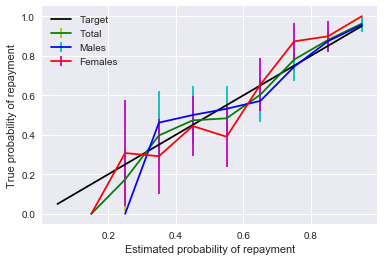

In [103]:
plt.plot(x-0.05, x-0.05, 'k-', label='Target')
plt.errorbar(x-0.05, y_a, color='g', yerr=ye_a, ecolor='y', label='Total')
plt.errorbar(x-0.05, y_m, color='b', yerr=ye_m, ecolor='c', label='Males')
plt.errorbar(x-0.05, y_f, color='r', yerr=ye_f, ecolor='m', label='Females')
plt.legend()
plt.xlabel('Estimated probability of repayment')
plt.ylabel('True probability of repayment')
plt.show()

So we see that the $2\sigma$ errrorbars mostly overlap, indicating there might be a slight difference, but it's hard to call it significant. Thus our banker seems to do a pretty good job of estimating the probability of default both for men and women.

What if we look at expected utility vs true utility?

In [104]:
print(df['EU'].max())
print(df['EU'].min())

17821.87501629068
-5874.758067061074


So the range of expected utility is from -6k to 18k. If we divide this into parts of 2k we can do the same as before, but it's probably very few extreme points with most around 0, so we might do a better split, for example so that we have 100 points in each group.

In [105]:
splits = (0, 99, 199, 299, 399, 499, 599, 699, 799, 899, 999)
x = [df['EU'].sort_values().iloc[i] for i in splits]
x[0] -= 1
y = {gender: 
     [np.mean(list(map(lambda x: x[0]*((1+rate)**x[1]-1) if x[2] == 1 else -x[0], 
                      df[['amount', 'duration', 'repaid']][(df['gender']==gender)&(df['EU']>x[i-1])&(df['EU']<=x[i])].values)))
      for i in range(1, len(x))]
     for gender in ('Male', 'Female')}
ye = {gender: 
      [stats.sem(list(map(lambda x: x[0]*((1+rate)**x[1]-1) if x[2] == 1 else -x[0], 
                          df[['amount', 'duration', 'repaid']][(df['gender']==gender)&(df['EU']>x[i-1])&(df['EU']<=x[i])].values)))
       for i in range(1, len(x))]
      for gender in ('Male', 'Female')}

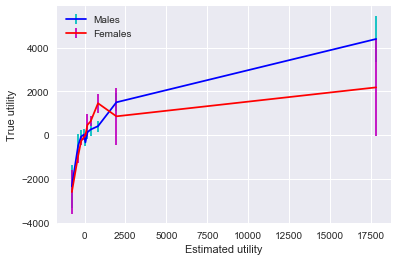

In [106]:
plt.errorbar(x[1:], y['Male'], color='b', yerr=ye['Male'], ecolor='c', label='Males')
plt.errorbar(x[1:], y['Female'], color='r', yerr=ye['Female'], ecolor='m', label='Females')
plt.legend()
plt.xlabel('Estimated utility')
plt.ylabel('True utility')
plt.show()

In this plot we have two problems. The interesting part of the graph is truncated because of the extreme value of the highest expected utility group, which is also less interesting because it's very variable in true utility. The other is that the expected utilityis overreported because it's given as the maximum in the group. These things we can fix.

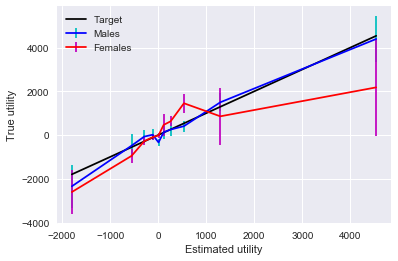

In [107]:
# Using all data as problems were smaller with fixed x-values, 
# change to hc=-i, lc=j to remove first j and last i
hc = 10
lc = 0
xs = [np.mean(df['EU'].sort_values().iloc[splits[i-1]:splits[i]].values) for i in range(1, len(splits))]
plt.plot(xs[lc:hc], xs[lc:hc], 'k-', label='Target')
plt.errorbar(xs[lc:hc], y['Male'][lc:hc], color='b', yerr=ye['Male'][lc:hc], ecolor='c', label='Males')
plt.errorbar(xs[lc:hc], y['Female'][lc:hc], color='r', yerr=ye['Female'][lc:hc], ecolor='m', label='Females')
plt.legend()
plt.xlabel('Estimated utility')
plt.ylabel('True utility')
plt.show()

We see something of the same picture as with the probabilities: The best females look slightly underrated by our banker, but the difference is not significant, and the males are quite well on target.

#### Balance: measure total variation of action for different outcomes as gender varies

In [108]:
from scipy.stats import beta

In [109]:
def perform_ci_test(A, Y, Z):
    def marginal_posterior(data, alpha, beta):
        n_data = len(data)
        total_probability = 1
        log_probability = 0
        for t in range(n_data):
            p = alpha / (alpha + beta)
            if (data[t] > 0):
                #total_probability *= p
                log_probability += np.log(p)
                alpha += 1
            else:
                #total_probability *= (1 - p)
                log_probability += np.log(1 - p)
                beta +=1
        return np.exp(log_probability)

    n_figures = 0
    P_D_mu0 = 0
    P_D_mu1 = 0
    for y in [-1, 1]:
        ## P(A | Y, Z = 1)
        positive = (Y==y) & (Z==1)
        positive_alpha = sum(A[positive]==1)
        positive_beta = sum(A[positive]==-1)
        positive_ratio = positive_alpha / (positive_alpha + positive_beta)

        ## P(A | Y, Z = - 1)
        negative = (Y==y) & (Z==-1)
        negative_alpha = sum(A[negative]==1)
        negative_beta = sum(A[negative]==-1)
        negative_ratio = negative_alpha / (negative_alpha + negative_beta)

        print("y: ", y, "Deviation: ", abs(positive_ratio - negative_ratio))

        print ("Calculate the marginals for each model")
        P_D_positive = marginal_posterior(A[positive], 1, 1)
        P_D_negative = marginal_posterior(A[negative], 1, 1)
        P_D = marginal_posterior(A[(Y==y)], 1, 1)

        print("Marginal likelihoods: ", P_D, P_D_negative, P_D_positive)
        ## Now you need to calculate the probability of either the
        ## dependent or independent model by combining all of the above
        ## into a single number.  This is not completely trivial, as you
        ## need to combine the negative and positive Z into it, but I
        ## think you can all work it out.

        P_D_mu0 += np.log(P_D)
        P_D_mu1 += np.log(P_D_positive) + np.log(P_D_negative)

        print ("Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity")


        # First plot the joint distribution
        prior_alpha = 1
        prior_beta = 1
        xplot = np.linspace(0, 1, 200)
        pdf_p = beta.pdf(xplot, prior_alpha + positive_alpha, prior_beta + positive_beta)
        pdf_n = beta.pdf(xplot, prior_alpha + negative_alpha, prior_beta + negative_beta)
        pdf_m = beta.pdf(xplot, prior_alpha + positive_alpha + negative_alpha, prior_beta + positive_beta + negative_beta)
        n_figures+=1
        plt.figure(n_figures)
        plt.clf()
        plt.plot(xplot, pdf_p)
        plt.plot(xplot, pdf_n)
        plt.plot(xplot, pdf_m)
        plt.legend(["z=1", "z=-1", "marginal"])
        plt.title("y=" + str(y))

    plt.show()

    P_D_mu0 = np.exp(P_D_mu0)
    P_D_mu1 = np.exp(P_D_mu1)
    print(r"$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = {}$".format(P_D_mu0/(P_D_mu0+P_D_mu1)))

In [110]:
Z = np.array([1 if z=='Female' else -1 for z in df['gender'].values])
Y = np.array([1 if y==1 else -1 for y in df['repaid'].values])
A = np.array([1 if a==1 else -1 for a in df['action'].values])

y:  -1 Deviation:  0.2785436380229598
Calculate the marginals for each model
Marginal likelihoods:  9.750060651057786e-88 3.944903542091022e-59 5.966635952488243e-25
Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity
y:  1 Deviation:  0.1989152434221677
Calculate the marginals for each model
Marginal likelihoods:  5.954078216187981e-200 3.8580498330283664e-134 2.747214792536823e-62
Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity


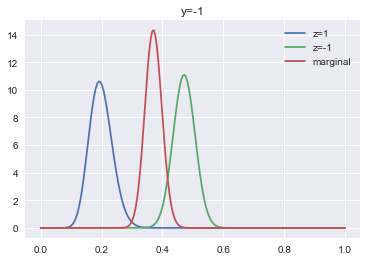

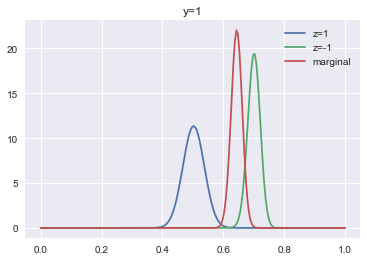

$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = 2.326995123573559e-09$


In [111]:
perform_ci_test(A, Y, Z)

So the modes of these distributions are the same as the values of the bar-plot above, but here additionally we get the distributions and we can see quite easily that there is, with probability close to 1, a marked difference in probability of having a loan granted given your future repayment if you are male or female. This is also suported by calculated $P(\mu_0|D)\approx10^{-9}$ with $\mu_0$ being action and gender being conditionally independent given the outcome. One thing this does not take into account, however, is that our banker isn't only looking at whether it thinks you'll default, but also at how much it will earn if you don't and lose if you do, but on the surface it looks as though our banker is not particularly balanced.

##### Calibration:
We can check calibration by just swapping the A and the Y in the ci_test-function

y:  -1 Deviation:  0.06408510638297871
Calculate the marginals for each model
Marginal likelihoods:  5.149097964640026e-132 4.424529177795728e-75 3.3975878557933514e-58
Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity
y:  1 Deviation:  0.03241430700447101
Calculate the marginals for each model
Marginal likelihoods:  2.1700349062312307e-123 7.395495465757588e-99 3.9648319139676285e-26
Now calculate a posterior distribution for the relevant Bernoulli parameter. Focus on just one value of y for simplicity


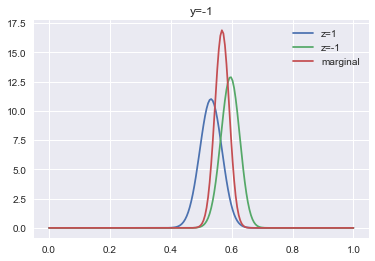

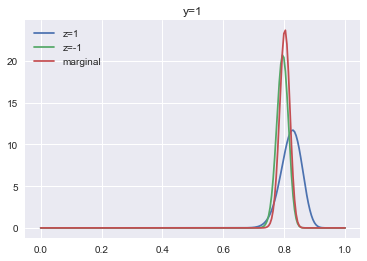

$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = 0.9620485032454965$


In [112]:
perform_ci_test(Y, A, Z)

A note on these plots is that the plot titles should of course read a=1/-1 rather than y.  
This again looks much like the graphs from the previous section, showing for proposed granted loans a slightly higher chance of repayment for females and for proposed non-granted loans a slightly lower rate of repayment, though this difference is not at all significant and we see that the estimated probability of our banker being calibrated with respect to gender being 96%.

#### What would happen if we look at fairness when also taking into account amount of loan requested? 

Basically then we would look at $P(a|y,z,l)$ vs $P(a|y,l)$ for balance and $P(y|a,z,l)$ vs $P(y|a,l)$ for calibration where $l$ is the amount of loan granted. For simplicity we can lump amounts into a few categories, say, Low, Medium, High, Very High.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1C1F75C18>,
      dtype=object)

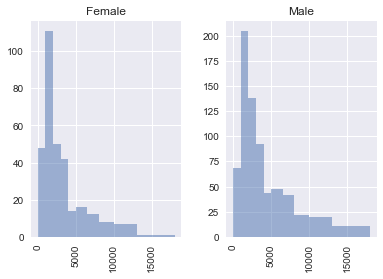

In [125]:
df.hist(column='amount', by='gender', alpha=0.5, bins=[0, 1000, 2000, 3000, 4000, 5000, 6500, 8000, 10000, 13000, 18000])

From this it appears that the males in general apply for slightly larger loans than females, so that there is some correlation between the two.

In [192]:
def marginal_posterior(data, alpha, beta):
    log_probability = 0
    for t in range(len(data)):
        p = alpha / (alpha + beta)
        if (data[t] > 0):
            log_probability += np.log(p)
            alpha += 1
        else:
            log_probability += np.log(1 - p)
            beta +=1
    return np.exp(log_probability)

In [145]:
bins = [0, 1500, 3000, 8000, 20000]
n_bins = len(bins)-1
def in_bin(l):
    for i in range(n_bins):
        if bins[i]<=l<bins[i+1]:
            return i

In [146]:
Z = np.array([1 if z=='Female' else -1 for z in df['gender'].values])
Y = np.array([1 if y==1 else -1 for y in df['repaid'].values])
A = np.array([1 if a==1 else -1 for a in df['action'].values])
L = np.array([in_bin(l) for l in df['amount'].values])

In [148]:
P_D_mu0 = 0
P_D_mu1 = 0
for l in range(n_bins):
    for y in [-1, 1]:
        indep_filter = (Y==y) & (L==l)
        for z in [-1, 1]:
            ## P(A | Y = y, Z = z, L = l)
            P_D_mu1 += np.log(marginal_posterior(A[indep_filter & (Z==z)], 1, 1))

        P_D_mu0 += np.log(marginal_posterior(A[indep_filter], 1, 1))

P_D_mu0 = np.exp(P_D_mu0)
P_D_mu1 = np.exp(P_D_mu1)
print(r"$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = {}$".format(P_D_mu0/(P_D_mu0+P_D_mu1)))

$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = 1.3013307355238604e-06$


So we see that the probability of the banker being balanced with regard to gender is significantly higher when taking amount into consideration, it is still minuscule and we can conclude that it is not.

In [149]:
P_D_mu0 = 0
P_D_mu1 = 0
for l in range(n_bins):
    for a in [-1, 1]:
        indep_filter = (A==a) & (L==l)
        for z in [-1, 1]:
            ## P(Y | A = a, Z = z, L = l)
            P_D_mu1 += np.log(marginal_posterior(Y[indep_filter & (Z==z)], 1, 1))

        P_D_mu0 += np.log(marginal_posterior(Y[indep_filter], 1, 1))

P_D_mu0 = np.exp(P_D_mu0)
P_D_mu1 = np.exp(P_D_mu1)
print(r"$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = {}$".format(P_D_mu0/(P_D_mu0+P_D_mu1)))

$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = 0.9997920702358508$


And we see that taking amount into account we find an even higher probability of calibration, at 99.98%

##### But what if we test the same with regard to duration, which actually has far more direct impact on the action decisions?

In [159]:
bins = [0, 10, 20, 40, 80]
Z = np.array([1 if z=='Female' else -1 for z in df['gender'].values])
Y = np.array([1 if y==1 else -1 for y in df['repaid'].values])
A = np.array([1 if a==1 else -1 for a in df['action'].values])
D = np.array([in_bin(d) for d in df['duration'].values])

P_D_mu0 = 0
P_D_mu1 = 0
for d in range(n_bins):
    for y in [-1, 1]:
        indep_filter = (Y==y) & (D==d)
        for z in [-1, 1]:
            ## P(A | Y = y, Z = z, D = d)
            P_D_mu1 += np.log(marginal_posterior(A[indep_filter & (Z==z)], 1, 1))

        P_D_mu0 += np.log(marginal_posterior(A[indep_filter], 1, 1))

P_D_mu0 = np.exp(P_D_mu0)
P_D_mu1 = np.exp(P_D_mu1)
print(r"$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = {}$".format(P_D_mu0/(P_D_mu0+P_D_mu1)))

P_D_mu0 = 0
P_D_mu1 = 0
for d in range(n_bins):
    for a in [-1, 1]:
        indep_filter = (A==a) & (D==d)
        for z in [-1, 1]:
            ## P(Y | A = a, Z = z, D = d)
            P_D_mu1 += np.log(marginal_posterior(Y[indep_filter & (Z==z)], 1, 1))

        P_D_mu0 += np.log(marginal_posterior(Y[indep_filter], 1, 1))

P_D_mu0 = np.exp(P_D_mu0)
P_D_mu1 = np.exp(P_D_mu1)
print(r"$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = {}$".format(P_D_mu0/(P_D_mu0+P_D_mu1)))

$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = 1.889377621233979e-05$
$P(\mu_0|D) = P(D|\mu_0) / P(D|\mu_0) + P(D|\mu_1) = 0.9994066860671641$


Much the same as for amount.

#### Using stochastic gradient descent, find a policy that balances out fairness and utlility

Well, I honestly don't know how to approach this, but I'll give it a shot  
I'll try to create a new utility function that reduces the true utility if the probability of balance and calibration are low. Then I'll try adjusting the probabilities of repayment calculated by the banker for males and females up and down for both for a sample of the dataset, calculate the adjusted utility for both adjustments and select the one that gives best utility adjusted for fairness between the one with increased probability of repayment for male and the one for females. Then I'll iterate this a set number of times, and hopefully we should have found an adjustment that gives the best adjusted utility that we could then apply to the decisions made by our banker.

In [160]:
adjustment = {'Male': 1, 'Female': 1}

In [163]:
def utility_f(utility, balance, calibration):
    """ Calculates a fairness-adjusted utility 
    
    Parameters
    ----------
    utility : 'float
        The pure utility of the banker
    balance : 'float'
        The probability of the banker being balanced
    calibration : 'float'
        The probability of the banker being calibrated
              
    Returns
    -------
    'float'
        A fairness-adjusted utility, adjusted according to predefined weights
    """
    wb = 1 # importance of balance, 0 is very important, toward infinity balance is discarded
    wc = 1 # same for calibration
    
    balance_factor = (wb+balance) / (wb+1)
    calibration_factor = (wc+calibration) / (wc+1)
    utility_correction = abs(utility) * (1 - balance_factor * calibration_factor)
    return utility - utility_correction

In [230]:
def get_fairness(d):
    Z = 1*(d['gender'].values=='Female')
    Y = 1*(d['repaid'].values==1)
    A = d['action'].values

    def do_calc(A, Y, Z):
        P_D_mu = np.zeros(2)
        for y in [0, 1]:
            for z in [0, 1]:
                P_D_mu[1] += np.log(marginal_posterior(A[(Y==y) & (Z==z)], 1, 1))
            P_D_mu[0] += np.log(marginal_posterior(A[(Y==y)], 1, 1))
        P_D_mu = np.exp(P_D_mu)
        return P_D_mu[0] / P_D_mu.sum()

    P_balance = do_calc(A, Y, Z)
    P_calibration = do_calc(Y, A, Z)
    return P_balance, P_calibration

In [226]:
def expected_utility(time, loan, prob):
    return loan * (prob * (1+rate)**time - 1)
def utility(time, loan, repaid):
    return loan * (((1+rate)**time - 1) if repaid==1 else -1)

In [232]:
iterations = 500
sample_size = 50
alpha = 0.01
utilities = np.zeros(iterations)
adj_utils = np.zeros(iterations)
bal = np.zeros(iterations)
cal = np.zeros(iterations)
for i in range(iterations):
    d = resample(df, n_samples=sample_size)
    for direction in (-1, 1):
        e = d.copy()
        for g in ('Male', 'Female'):
            e[e['gender']==g]['proba good'] *= adjustment[g] + alpha * direction * (-1 if g=='Male' else 1)
        e['EU'] = expected_utility(d['duration'], e['amount'], e['proba good'])
        e['action'] = 1*(e['EU']>=0)
        util = np.zeros(sample_size)
        for j in range(sample_size):
            util[j] = utility(e['duration'].iloc[j], e['amount'].iloc[j], e['repaid'].iloc[j])
        b, c, u, a = (bal[i], cal[i], utilities[i], adj_utils[i])
        bal[i], cal[i] = get_fairness(e)
        utilities[i] = util.sum()
        adj_utils[i] = utility_f(utilities[i], bal[i], cal[i])
    if adj_utils[i] < a:
        direction = -1
        bal[i], cal[i], utilities[i], adj_utils[i] = (b, c, u, a)
    for g in ('Male', 'Female'):
        adjustment[g] += alpha * direction * (-1 if g=='Male' else 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


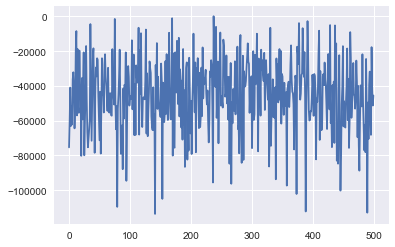

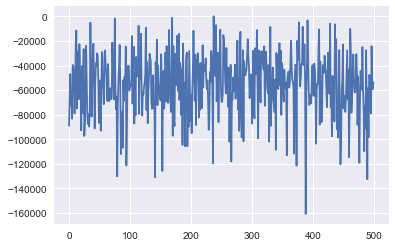

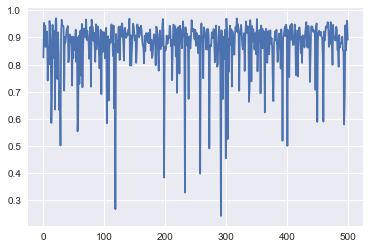

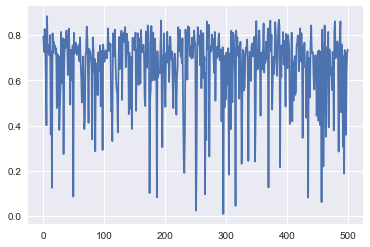

In [233]:
plt.plot(np.arange(iterations), utilities)
plt.show()
plt.plot(np.arange(iterations), adj_utils)
plt.show()
plt.plot(np.arange(iterations), bal)
plt.show()
plt.plot(np.arange(iterations), cal)
plt.show()

In [235]:
adjustment

{'Female': 5.999999999999916, 'Male': -3.9999999999999596}

Well, that obviously didn't work. How I get a probability of balance close to 1 for the unadjusted banker when our previous calculations found that to be close to 0 I don't know. This seems like a lot of debugging work, and I'm not even sure the method is valid, so I'll just leave it at that. I'd dearly like to know how this should have been solved, though!

## Conclusion

The banker attached in the file aleksaw_banker.py seems to do a fairly good job at predicting whether a customer will repay their loan or not, although the signal in the data seems to be rather weak. It does this by using three different classifiers, weighing them by performance and using this to get an aggregate prediction. It seems like different training sets will yield wildly different hyperparameters, so performance will probably be almost as good just selecting some reasonable parameters manually, saving the heavy bit of the fitting procedure. 

The banker is extended by a private banker that includes the option to noisify the training data to increase the privacy of the people in the database as well as an option to protect the privacy of new customers by creating private decisions on new loans. It appears, however, that due to the weak signal in the data we need a significantly higher interest rate to still make money while providing some reasonable amount of privacy.

The banker seems well calibrated in it's decisions with regard to gender, but unfortunately it is very unbalanced, and women are far less likely to be granted loans than men given their eventual repayment status. At the sam